In [ ]:
pip install scikit-fuzzy

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temperature = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temperature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rainfall')

wind['very_low']  = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low']       = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal']    = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high']      = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temperature['very_low']  = fuzz.trimf(temperature.universe, [20.4, 23.6, 26.8])
temperature['low']       = fuzz.trimf(temperature.universe, [23.6, 26.8, 30])
temperature['normal']    = fuzz.trimf(temperature.universe, [26.8, 30, 33.2])
temperature['high']      = fuzz.trimf(temperature.universe, [30, 33.2, 36.4])
temperature['very_high'] = fuzz.trimf(temperature.universe, [33.2, 36.4, 39.6])

rainfall['very_low']  = fuzz.trimf(rainfall.universe, [0.2, 1.7, 3.2])
rainfall['low']       = fuzz.trimf(rainfall.universe, [1.7, 3.2, 4.7])
rainfall['normal']    = fuzz.trimf(rainfall.universe, [3.2, 4.7, 6.2])
rainfall['high']      = fuzz.trimf(rainfall.universe, [4.7, 6.2, 7.7])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6.2, 7.7, 9.2])

rule1 = ctrl.Rule(wind['very_low']  & temperature['very_low'],  rainfall['very_high'])
rule2 = ctrl.Rule(wind['low']       & temperature['low'],       rainfall['high'])
rule3 = ctrl.Rule(wind['normal']    & temperature['normal'],    rainfall['normal'])
rule4 = ctrl.Rule(wind['high']      & temperature['high'],      rainfall['low'])
rule5 = ctrl.Rule(wind['very_high'] & temperature['very_high'], rainfall['very_low'])
rule6 = ctrl.Rule(wind['very_low']  & temperature['very_high'], rainfall['low'])

rainfall_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
rainfall_sim = ctrl.ControlSystemSimulation(rainfall_ctrl)

rainfall_sim.input['wind'] = 2.2
rainfall_sim.input['temperature'] = 30
rainfall_sim.compute()

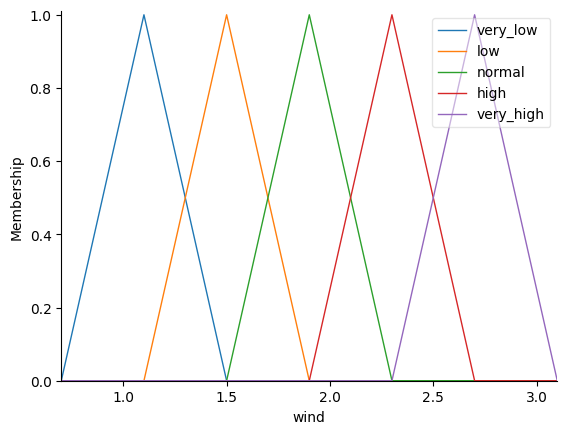

In [7]:
wind.view()

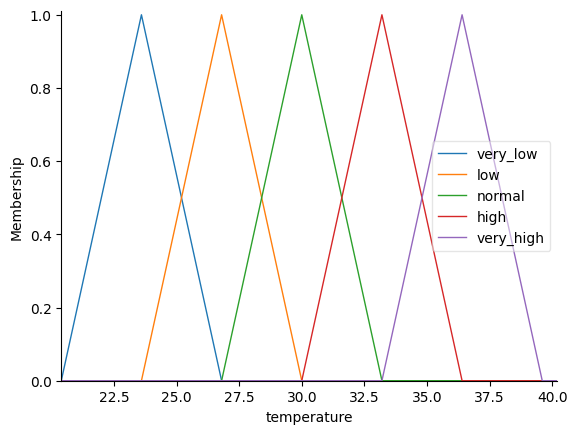

In [9]:
temperature.view()


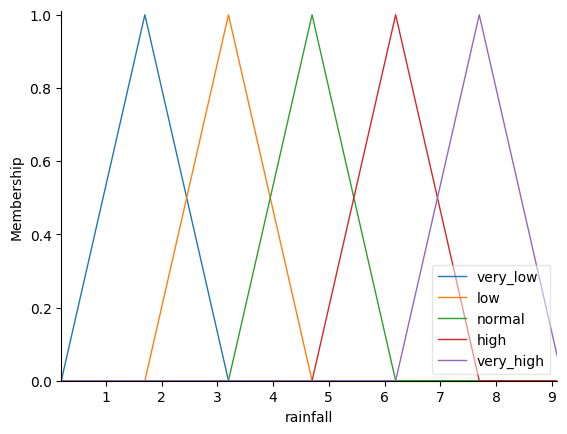

In [10]:
rainfall.view()

4.699999999999781


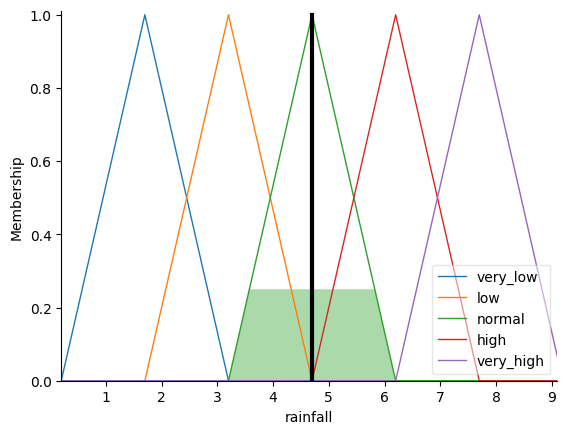

In [13]:
print(rainfall_sim.output['rainfall'])
rainfall.view(sim=rainfall_sim)
